In [12]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [13]:
# 데이터 가져오기

origin_hotel = pd.read_csv('./Hotel_Reviews.csv',error_bad_lines=False) #<class 'pandas.core.frame.DataFrame'>
hotel= origin_hotel.copy()

In [14]:
# hotel 데이터의 전체적인 정보 출력
print(hotel.info())

# 데이터의 결측치 확인
print(hotel.isna().sum()) # lat/lng에서 각각 3268개의 NA값이 확인됨


# 데이터의 결측치 처리 결측치는 각 열의 평균으로 하려고 했지만, 결과가 오지게 안나와서 그냥 0 으로 처리 아무래도 5000개의 데이터의 평균을 구하기 쉽지 않았을거다.
hotel_fillna = hotel.fillna(0)
print(hotel_fillna.isna().sum()) #결측치를 -으로 처리 !

# 결측치를 없앤 값을 다시 hotel dataframe에 대입
hotel = hotel_fillna



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
Name: Reviewer_Nationality, dtype: int64


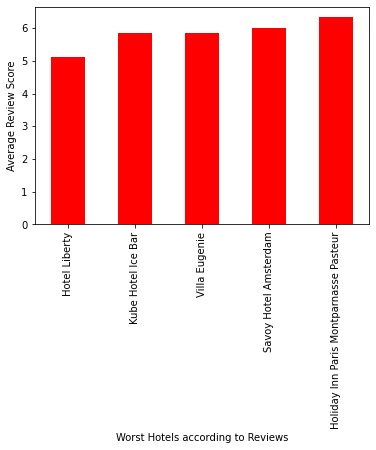

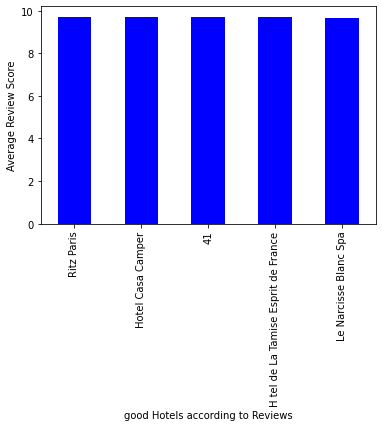

In [15]:
# 리뷰어가 어디가 제일 많은지 봐보자
reviewer = hotel['Reviewer_Nationality'].value_counts().sort_values(ascending=False).head(20)
print(reviewer)


# 평이 안좋은 호텔 시각화
worst_hotels =hotel.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=True).head(5)
worst_hotels.plot(kind="bar",color="Red")
_=plt.xlabel('Worst Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()

# 평이 좋은 호텔 시각화
good_hotels =hotel.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(5)
good_hotels.plot(kind="bar",color="blue")
_=plt.xlabel('good Hotels according to Reviews')
_=plt.ylabel('Average Review Score')
plt.show()